# Atividade 0 - Uso do Jupyter, Git, Matplotlib e Transformações Lineares

### **Descrição da Tarefa:**

Implemente, utilizando uma ferramenta do tipo Jupyter (ex.: Jupyter Notebook, JupyterLab, Google Colab), um notebook que demonstre:

1. **Rotação horária de 90°** e **shear (cisalhamento) em x**, diferentes dos exemplos apresentados em sala.
2. A **obtenção das matrizes de transformação** a partir dos **vetores unitários (bases)** — mostrando o processo **numericamente** e **graficamente** com o **Matplotlib**.
3. A **aplicação passo a passo** dessas matrizes a **dois vetores arbitrários**, com apresentação de resultados **numéricos** e **gráficos** no Matplotlib.




IMPORTAÇÕES


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Definição das Matrizes de Transformação

In [36]:
# 1. Matriz de Rotação Horária de 90° (R)
R_horaria_90 = np.array([
    [0, 1],
    [-1, 0]
])

# 2. Matriz de Shear em X (Sx)

k_shear = 0.7
Sx_0_7 = np.array([
    [1, k_shear],
    [0, 1]
])


Definição dos Vetores de Teste

In [37]:


# Vetores da Base Canônica (unitários)
e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])
base_vectors = np.hstack([e1, e2])

# Vetores Arbitrários
u = np.array([[3], [2]])
v = np.array([[-1], [4]])
arbitrary_vectors = np.hstack([u, v])

print("Matriz Rotação 90° Horária (R):\n", R_horaria_90)
print(f"\nMatriz Shear em X (Sx, k={k_shear}):\n", Sx_0_7)

Matriz Rotação 90° Horária (R):
 [[ 0  1]
 [-1  0]]

Matriz Shear em X (Sx, k=0.7):
 [[1.  0.7]
 [0.  1. ]]


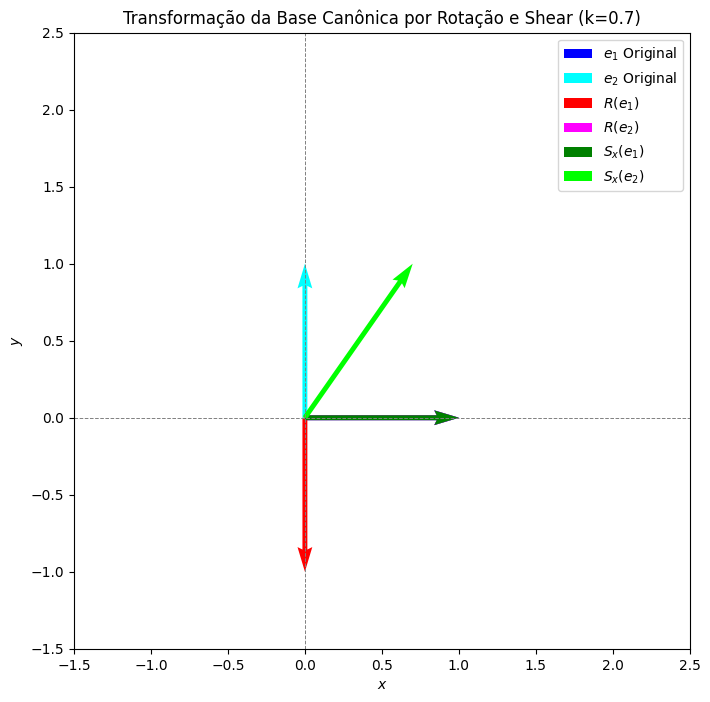

In [38]:
# CÁLCULOS: Transformando os vetores da base
e1_rot = R_horaria_90 @ e1
e2_rot = R_horaria_90 @ e2
base_rot = np.hstack([e1_rot, e2_rot])

e1_shear = Sx_0_7 @ e1
e2_shear = Sx_0_7 @ e2
base_shear = np.hstack([e1_shear, e2_shear])

# FUNÇÃO AUXILIAR DE PLOTAGEM
def plot_base_vectors(ax, original, rot, shear, title):
    ax.axhline(0, color='gray', linestyle='--', linewidth=0.7)
    ax.axvline(0, color='gray', linestyle='--', linewidth=0.7)

    # Vetores Originais (Azul/Ciano)
    ax.quiver(0, 0, original[0, 0], original[1, 0], angles='xy', scale_units='xy', scale=1, color='blue', label='$e_1$ Original', width=0.008)
    ax.quiver(0, 0, original[0, 1], original[1, 1], angles='xy', scale_units='xy', scale=1, color='cyan', label='$e_2$ Original', width=0.008)

    # Vetores Transformados (Rotação - Vermelho/Magenta)
    ax.quiver(0, 0, rot[0, 0], rot[1, 0], angles='xy', scale_units='xy', scale=1, color='red', label='$R(e_1)$', width=0.008)
    ax.quiver(0, 0, rot[0, 1], rot[1, 1], angles='xy', scale_units='xy', scale=1, color='magenta', label='$R(e_2)$', width=0.008)

    # Vetores Transformados (Shear - Verde/Lima)
    ax.quiver(0, 0, shear[0, 0], shear[1, 0], angles='xy', scale_units='xy', scale=1, color='green', label='$S_x(e_1)$', width=0.008)
    ax.quiver(0, 0, shear[0, 1], shear[1, 1], angles='xy', scale_units='xy', scale=1, color='lime', label='$S_x(e_2)$', width=0.008)

    ax.set_xlim(-1.5, 2.5)
    ax.set_ylim(-1.5, 2.5)
    ax.set_aspect('equal', adjustable='box')
    ax.legend(loc='upper right')
    ax.set_title(title)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

fig, ax = plt.subplots(figsize=(8, 8))
plot_base_vectors(ax, base_vectors, base_rot, base_shear,
                  'Transformação da Base Canônica por Rotação e Shear (k=0.7)')
plt.show()

In [39]:
# FUNÇÃO AUXILIAR DE PLOTAGEM MODIFICADA PARA FORMAS FECHADA

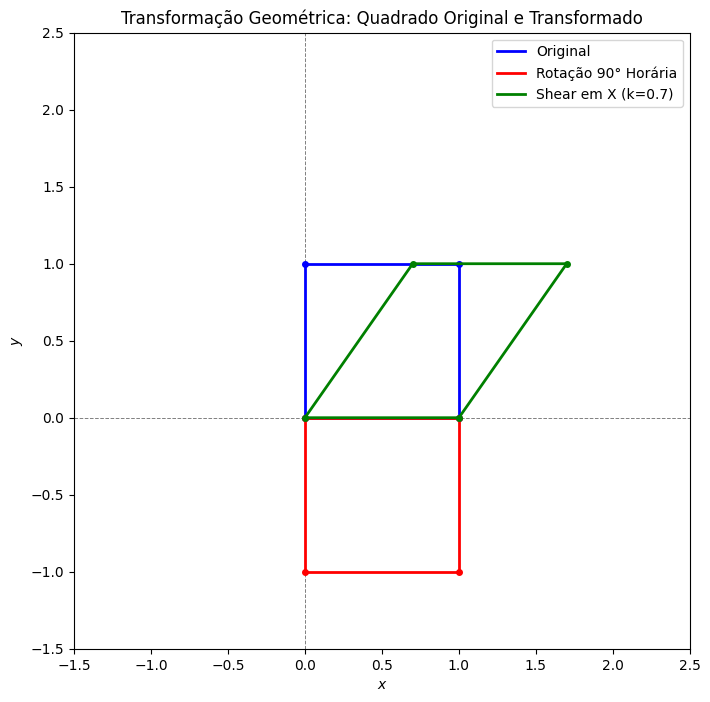

In [40]:


quadrado = np.array([
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0]
])

quadrado_rot = R_horaria_90 @ quadrado
quadrado_shear = Sx_0_7 @ quadrado


def plot_square_transformation(ax, original, rot, shear, title):
    # 1. Linhas de Referência
    ax.axhline(0, color='gray', linestyle='--', linewidth=0.7)
    ax.axvline(0, color='gray', linestyle='--', linewidth=0.7)

    # 2. Plotar o quadrado original (Azul) - Usa ax.plot para conectar pontos
    ax.plot(original[0], original[1], 'b-', label='Original', linewidth=2)
    ax.plot(original[0, :-1], original[1, :-1], 'bo', markersize=4)

    # 3. Plotar o quadrado rotacionado (Vermelho)
    ax.plot(rot[0], rot[1], 'r-', label='Rotação 90° Horária', linewidth=2)
    ax.plot(rot[0, :-1], rot[1, :-1], 'ro', markersize=4)

    # 4. Plotar o quadrado cisalhado (Verde)
    ax.plot(shear[0], shear[1], 'g-', label=f'Shear em X (k=0.7)', linewidth=2)
    ax.plot(shear[0, :-1], shear[1, :-1], 'go', markersize=4)

    # 5. Configurações de visualização
    ax.set_xlim(-1.5, 2.5)
    ax.set_ylim(-1.5, 2.5)
    ax.set_aspect('equal', adjustable='box')
    ax.legend(loc='upper right')
    ax.set_title(title)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

fig, ax = plt.subplots(figsize=(8, 8))
plot_square_transformation(ax, quadrado, quadrado_rot, quadrado_shear,
                           'Transformação Geométrica: Quadrado Original e Transformado')
plt.show()

<>:63: SyntaxWarning: invalid escape sequence '\c'
<>:63: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-132396289.py:63: SyntaxWarning: invalid escape sequence '\c'
  'Rotação Horária de $90^\circ$ Aplicada a Vetores Arbitrários')



--- Resultados Numéricos das Transformações ---
| Vetor Original   | Rot. 90° H (R)   | Shear X (Sx, k=0.7)   |
|:-----------------|:-----------------|:----------------------|
| u=(3, 2)         | R(u)=(2, -3)     | Sx(u)=(4.4, 2.0)      |
| v=(-1, 4)        | R(v)=(4, 1)      | Sx(v)=(1.8, 4.0)      |


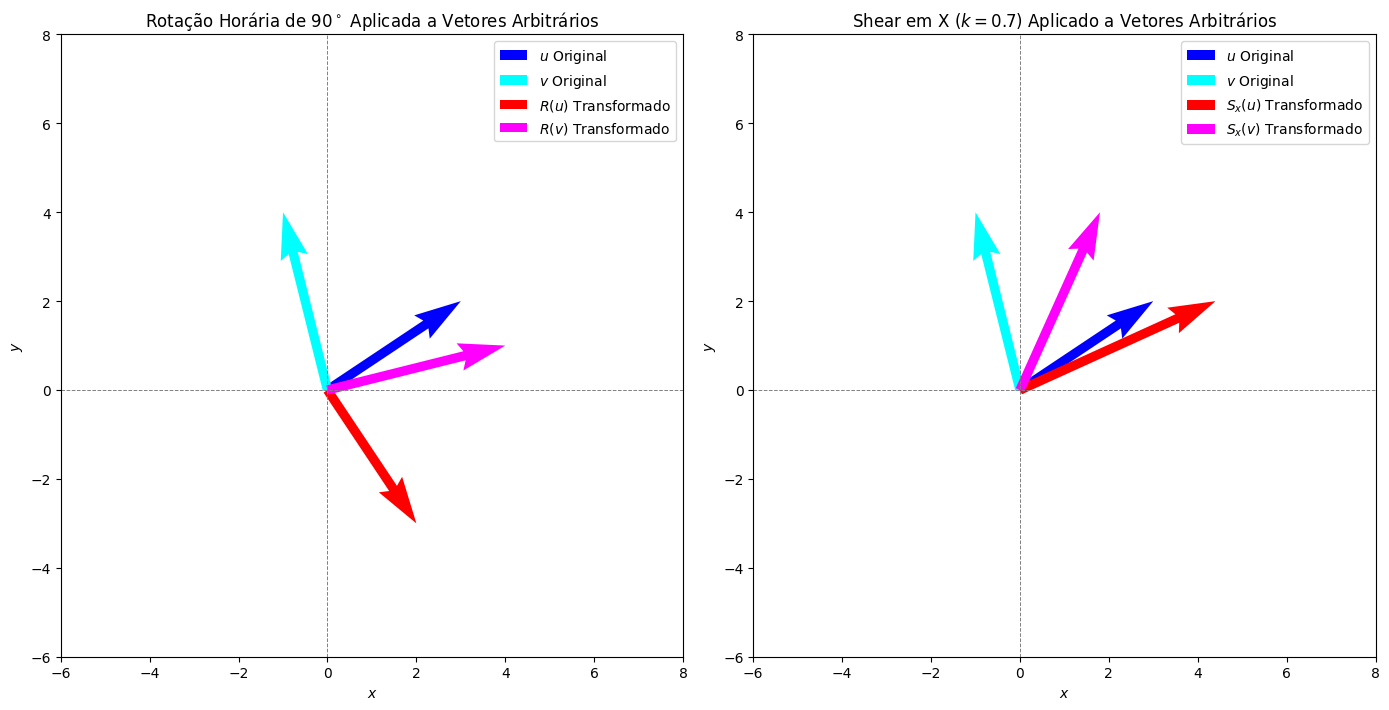

In [41]:
# CÁLCULOS: Transformando os vetores arbitrários
u_rot = R_horaria_90 @ u
v_rot = R_horaria_90 @ v
arbitrary_rot = np.hstack([u_rot, v_rot])

# b) Shear em X (k=0.7)
u_shear = Sx_0_7 @ u
v_shear = Sx_0_7 @ v
arbitrary_shear = np.hstack([u_shear, v_shear])

# GERAÇÃO DA TABELA DE RESULTADOS
results = {
    'Vetor Original': [f'u=({u[0,0]}, {u[1,0]})', f'v=({v[0,0]}, {v[1,0]})'],
    'Rot. 90° H (R)': [f'R(u)=({u_rot[0,0]}, {u_rot[1,0]})', f'R(v)=({v_rot[0,0]}, {v_rot[1,0]})'],
    f'Shear X (Sx, k={k_shear})': [f'Sx(u)=({u_shear[0,0]:.1f}, {u_shear[1,0]:.1f})', f'Sx(v)=({v_shear[0,0]:.1f}, {v_shear[1,0]:.1f})']
}
results_df = pd.DataFrame(results)

print("\n--- Resultados Numéricos das Transformações ---")
print(results_df.to_markdown(index=False))


# VISUALIZAÇÃO GRÁFICA DOS VETORES ARBITRÁRIOS
def plot_arbitrary_vectors(ax, original_vectors, transformed_vectors, R_or_S, title):
    ax.axhline(0, color='gray', linestyle='--', linewidth=0.7)
    ax.axvline(0, color='gray', linestyle='--', linewidth=0.7)


    LINE_WIDTH = 0.015

    # Plotar vetores originais (u e v)
    ax.quiver(0, 0, original_vectors[0, 0], original_vectors[1, 0],
              angles='xy', scale_units='xy', scale=1, color='blue',
              label='$u$ Original', width=LINE_WIDTH)
    ax.quiver(0, 0, original_vectors[0, 1], original_vectors[1, 1],
              angles='xy', scale_units='xy', scale=1, color='cyan',
              label='$v$ Original', width=LINE_WIDTH)


    # R(u) é (2, -3). Para melhor visualização, é plotado em vermelho.
    ax.quiver(0, 0, transformed_vectors[0, 0], transformed_vectors[1, 0],
              angles='xy', scale_units='xy', scale=1, color='red',
              label=f'${R_or_S}(u)$ Transformado', width=LINE_WIDTH)

    # R(v) é (4, 1). É plotado em magenta.
    ax.quiver(0, 0, transformed_vectors[0, 1], transformed_vectors[1, 1],
              angles='xy', scale_units='xy', scale=1, color='magenta',
              label=f'${R_or_S}(v)$ Transformado', width=LINE_WIDTH)


    ax.set_xlim(-6, 8)
    ax.set_ylim(-6, 8)
    ax.set_aspect('equal', adjustable='box')
    ax.legend(loc='upper right')
    ax.set_title(title)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(14, 7))

# Plot Rotação de Vetores Arbitrários
plot_arbitrary_vectors(ax3, arbitrary_vectors, arbitrary_rot, 'R',
                       'Rotação Horária de $90^\circ$ Aplicada a Vetores Arbitrários')

# Plot Shear de Vetores Arbitrários
plot_arbitrary_vectors(ax4, arbitrary_vectors, arbitrary_shear, 'S_x',
                       f'Shear em X ($k={k_shear}$) Aplicado a Vetores Arbitrários')

plt.tight_layout()
plt.show()